#Section 03. 워드 클라우드 시각화

##1. 데이터 가져오기

In [1]:
# proverb.txt
contents=""" 작은 일에 성실한 사람은 큰일에도 성실하고,
작은 일에 정직하지 못한 사람은 큰일에도 정직하지 못하다.
누가복음 16:10
변함없이 서로 사랑하는 이가 친구이며
위급할 때 서로 돕는 이가 형제다.
잠언 17:17"""
file=open("./proverb.txt", 'w') #mode w
file.write(contents)
file.close()
# hello.txt
file=open("./hello.txt",'a')
while 1:
  content=input()
  if not content: break
  file.write(content+ '\n')
  print(content)
file.close()

# fruits.txt
fruits=["apple","apple","apple","banana","banana","orange","mango","orange","orange","orange"]
index=len(fruits)
file=open("./fruits.txt",'a')
for i in range(len(fruits)):
  if i < (index-1):
    file.write(fruits[i]+'\t')
  else:
    file.write(fruits[i]+'\n')
file.close()

In [14]:
import os
import glob
f1=[]
for file in glob.glob('*.txt'):
  with open(file, 'r', newline='') as filereader:
    for row in filereader:
      contents=row.split()
      for i in contents:
        contents=i.strip('.').strip(',').strip('')
        f1.append(contents)
f1

['apple',
 'apple',
 'apple',
 'banana',
 'banana',
 'orange',
 'mango',
 'orange',
 'orange',
 'orange',
 'apple',
 'apple',
 'apple',
 'banana',
 'banana',
 'orange',
 'mango',
 'orange',
 'orange',
 'orange',
 '안녕하세요',
 'hello',
 '내용을',
 '추가합니다',
 '저장하는',
 '문서',
 '이름',
 "'w'",
 '대신',
 "'a'를",
 '사용합니다',
 '작은',
 '일에',
 '성실한',
 '사람은',
 '큰일에도',
 '성실하고',
 '작은',
 '일에',
 '정직하지',
 '못한',
 '사람은',
 '큰일에도',
 '정직하지',
 '못하다',
 '누가복음',
 '16:10',
 '변함없이',
 '서로',
 '사랑하는',
 '이가',
 '친구이며',
 '위급할',
 '때',
 '서로',
 '돕는',
 '이가',
 '형제다',
 '잠언',
 '17:17']

In [15]:
import os
import glob

f1=[]
for file in glob.glob('*.txt'):
  with open(file, 'r', newline='') as filereader:
    for row in filereader:
      contents=row.split()
      for i in contents:
        contents=i.strip('.').strip(',').strip('').strip('를').strip('을').strip("''")
        contents=contents.strip('합니다').strip('하세요')
        contents=contents.strip('에')
        f1.append(contents)
f1

['apple',
 'apple',
 'apple',
 'banana',
 'banana',
 'orange',
 'mango',
 'orange',
 'orange',
 'orange',
 'apple',
 'apple',
 'apple',
 'banana',
 'banana',
 'orange',
 'mango',
 'orange',
 'orange',
 'orange',
 '안녕',
 'hello',
 '내용',
 '추가',
 '저장하는',
 '문서',
 '이름',
 'w',
 '대신',
 'a',
 '사용',
 '작은',
 '일',
 '성실한',
 '사람은',
 '큰일에도',
 '성실하고',
 '작은',
 '일',
 '정직하지',
 '못한',
 '사람은',
 '큰일에도',
 '정직하지',
 '못',
 '누가복음',
 '16:10',
 '변함없이',
 '서로',
 '사랑하는',
 '이가',
 '친구이며',
 '위급할',
 '때',
 '서로',
 '돕는',
 '이가',
 '형제',
 '잠언',
 '17:17']

##2. 단어의 빈도수 구하기

In [16]:
from collections import Counter
f1
word_counts=Counter(f1)
dict(word_counts)
# word_counts.items()
wc=sorted(word_counts.items(),key=lambda count:count[1], reverse=True)
wc

[('orange', 8),
 ('apple', 6),
 ('banana', 4),
 ('mango', 2),
 ('작은', 2),
 ('일', 2),
 ('사람은', 2),
 ('큰일에도', 2),
 ('정직하지', 2),
 ('서로', 2),
 ('이가', 2),
 ('안녕', 1),
 ('hello', 1),
 ('내용', 1),
 ('추가', 1),
 ('저장하는', 1),
 ('문서', 1),
 ('이름', 1),
 ('w', 1),
 ('대신', 1),
 ('a', 1),
 ('사용', 1),
 ('성실한', 1),
 ('성실하고', 1),
 ('못한', 1),
 ('못', 1),
 ('누가복음', 1),
 ('16:10', 1),
 ('변함없이', 1),
 ('사랑하는', 1),
 ('친구이며', 1),
 ('위급할', 1),
 ('때', 1),
 ('돕는', 1),
 ('형제', 1),
 ('잠언', 1),
 ('17:17', 1)]

In [17]:
import pandas as pd
wcdf=pd.DataFrame(wc)
wcdf.columns=['word', 'freq']


In [18]:
wcdf1=wcdf.set_index('word')
wcdf1.head()

,freq
word,
orange,8
apple,6
banana,4
mango,2
작은,2


##3. 워드 클라우드 구현하기

In [52]:
!pip install wordcloud
!pip install konlpy

You should consider upgrading via the 'C:\python\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\python\python.exe -m pip install --upgrade pip' command.


In [75]:
import pandas as pd
import numpy as np
import re
# 한글 표현을 위해 폰트 설치
%config InlineBackend.figure_format ='retina'
!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
# 나눔바른고딕 사용
fontpath='C:/Windows/Fonts/NanumGothic.ttf'
font=fm.FontProperties(fname=fontpath, size=9)

지정된 경로를 찾을 수 없습니다.


## 한글이 제대로 표시되지 않는다면 
함께 첨부된 NanumGothic.ttf 파일에서 마우스 오른쪽 단추 [설치] 메뉴를 클릭하여 글꼴을 설치한후 실행합니다.

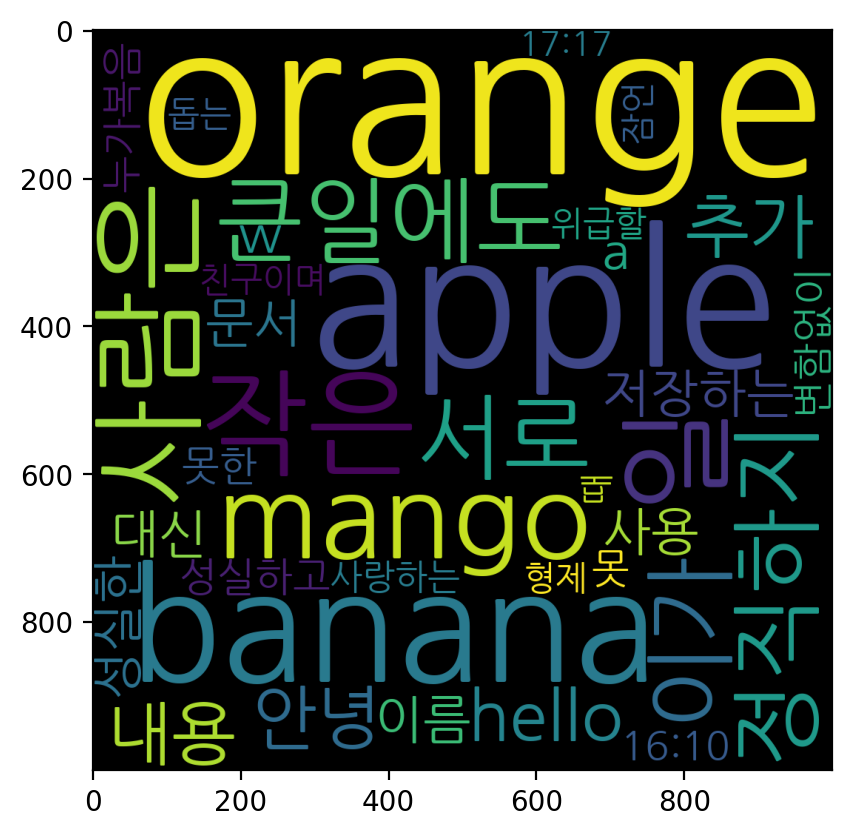

In [76]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

word_freq=wcdf1['freq'].to_dict()
wordcloud=WordCloud(font_path='NanumGothic.ttf', width=1000, height=1000).generate_from_frequencies(word_freq)
plt.imshow(wordcloud)
plt.show()

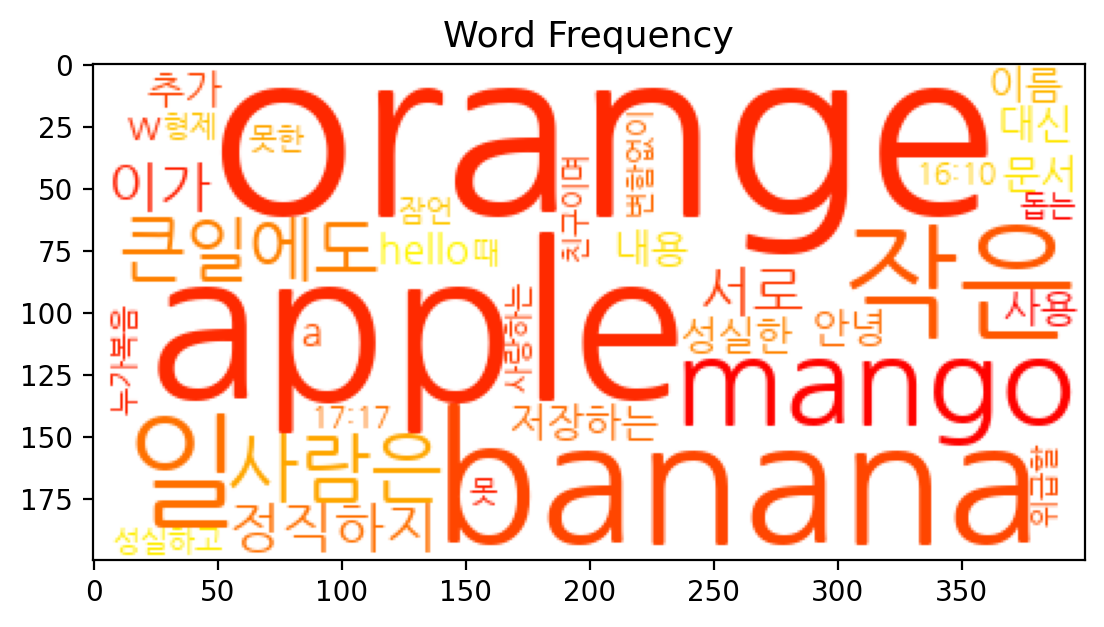

In [77]:
wordcloud=WordCloud(font_path='NanumGothic.ttf', background_color='white', colormap
='autumn').generate_from_frequencies(word_freq)
plt.imshow(wordcloud)
plt.title('Word Frequency', size=13) # 제목 지정
plt.show()

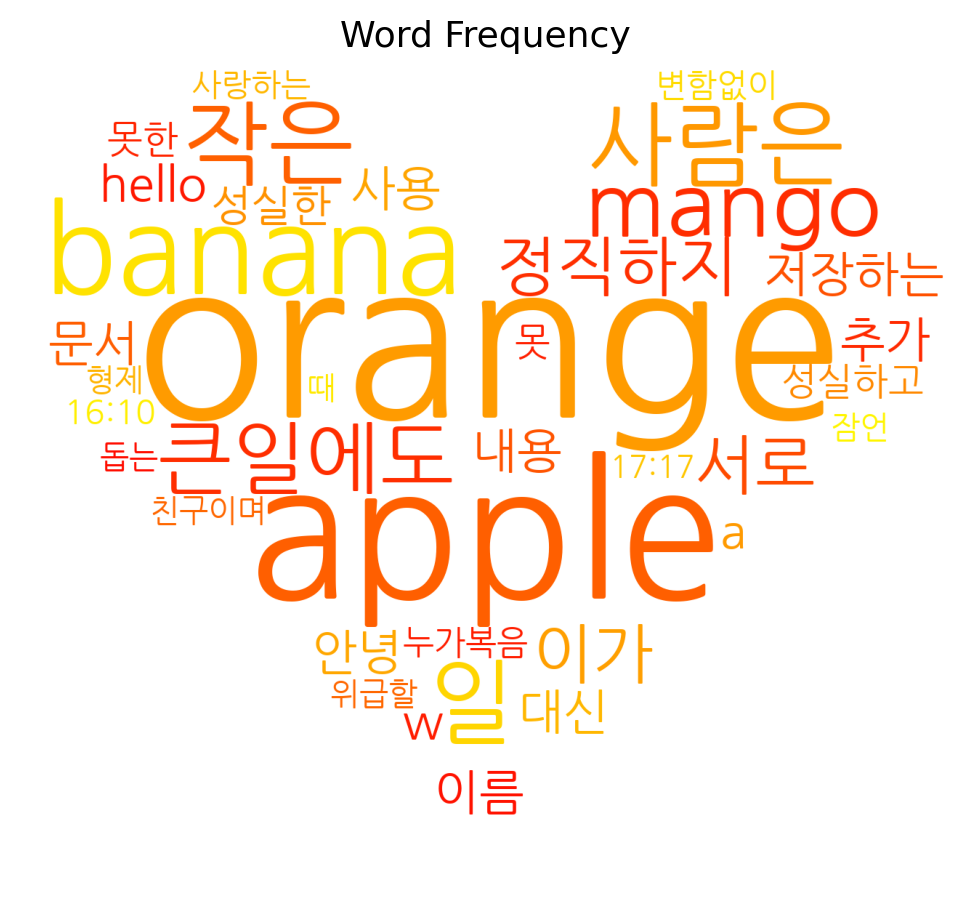

In [78]:
from PIL import Image
import numpy as np
im=Image.open('heart.png') # 이미지 파일 읽어오기
mask_arr=np.array(im) # 픽셀 값 배열 형태 변환
wordcloud=WordCloud(font_path='NanumGothic.ttf', background_color='white', colormap='autumn',width=700,height=700,random_state=43,mask=mask_arr,prefer_horizontal=True).generate_from_frequencies(word_freq)
plt.figure(figsize=(6, 6))
plt.imshow(wordcloud)
plt.title('Word Frequency', size=13)
plt.axis('off')
plt.show()